<h1 align="center">Previsão do Preço do Diamante<h1/>

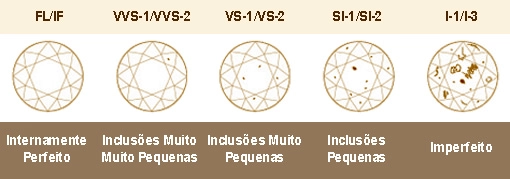

Data Scientist Jr.: Karina Gonçalves Soares

Link de estudo:

* [Dataset](https://www.kaggle.com/datasets/shivam2503/diamonds)
* [Profundidade e mesa](https://pt.kobelli.jewelry/blogs/jewelry/diamond-depth-table)
* [Clasificação de Clareza](https://blog.poesie.com.br/diamantes/aprenda-sobre-diamantes-4-cs-classificacao-de-clareza/)

O objetivo desta análise é `prever o preço dos diamantes com base nas suas características`.
O conjunto de dados usado para esta análise é o conjunto de dados Diamonds do Kaggle. O conjunto de dados
contém 53.940 observações e 10 variáveis. As variáveis ​​são as seguintes:

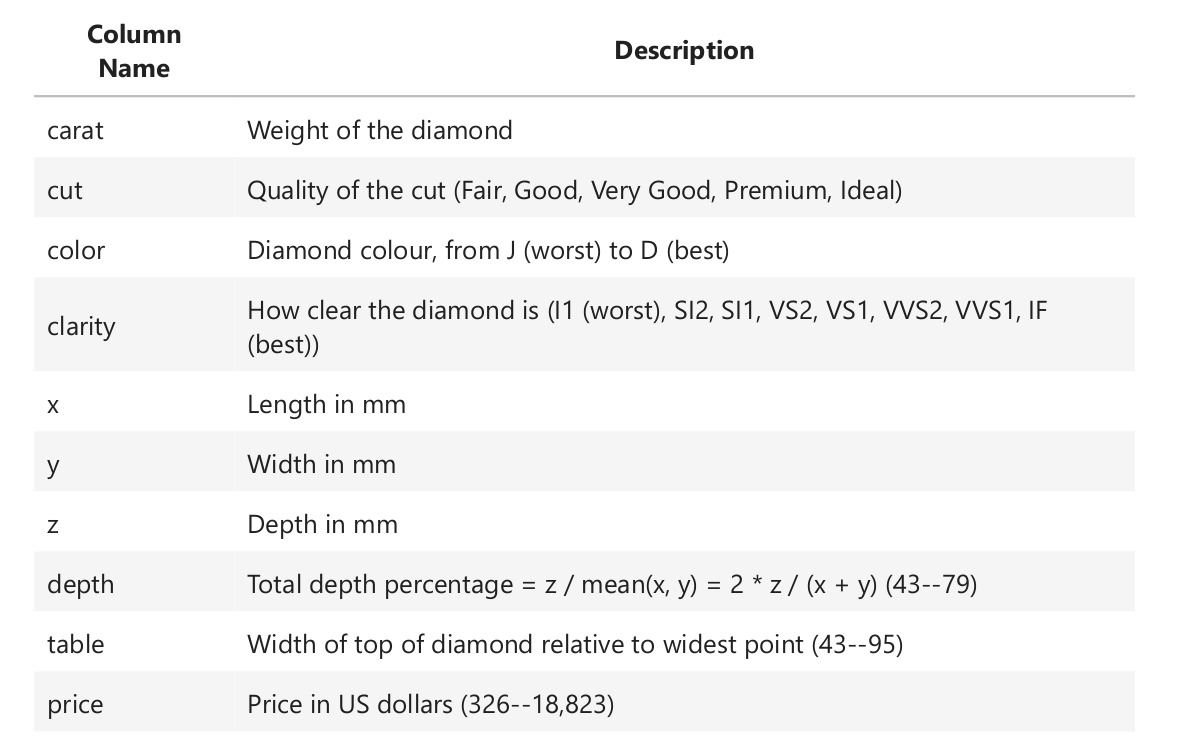

In [1]:
# Importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('/home/karinag/karina_python/git-hub/caracteristicas_e_preco_do_diamante/dataset/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### <font color="orange"> Pré-processamento dos Dados</font>

In [46]:
df.shape

(53940, 11)

In [47]:
# Checando valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [48]:
# Descrição estatística
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [49]:
# Valores únicos
print(df.cut.value_counts(),'\n',df.color.value_counts(),'\n',df.clarity.value_counts(),'\n',df.depth.value_counts(),'\n',df.table.value_counts(),'\n',df.price.value_counts(),'\n',df.x.value_counts(),'\n',df.y.value_counts(),'\n',df.y.value_counts(),'\n',df.z.value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 
 color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 
 clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 
 depth
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: count, Length: 184, dtype: int64 
 table
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: count, Length: 127, dtype: int64 
 price
605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: count, Length: 11602, dtype: int64 
 x
4.37     448
4.34     437
4.33     429
4

In [50]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [51]:
df.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
41008,41009,0.58,Ideal,H,SI1,61.6,57.0,1184,5.34,5.38,3.30
45694,45695,0.70,Fair,I,SI1,65.8,57.0,1697,5.46,5.55,3.62
5432,5433,0.79,Ideal,E,VS2,62.2,55.0,3827,5.90,5.97,3.69
37943,37944,0.33,Very Good,H,VS2,58.8,62.0,486,4.49,4.53,2.65
5374,5375,0.30,Premium,G,SI1,62.7,58.0,574,4.27,4.22,2.66


### <font color="orange"> Análise exploratória de dados</font>

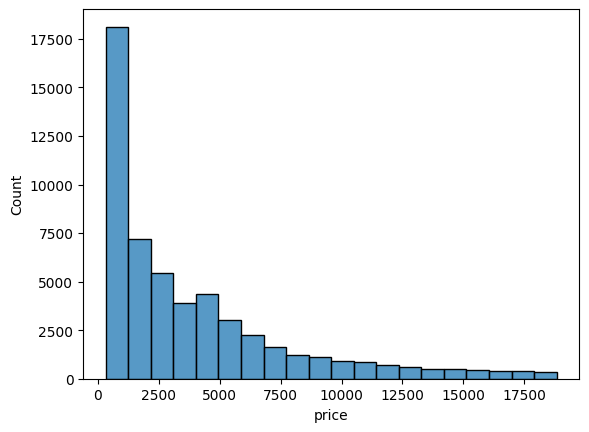

In [52]:
sns.histplot(df['price'],bins = 20)
plt.show()

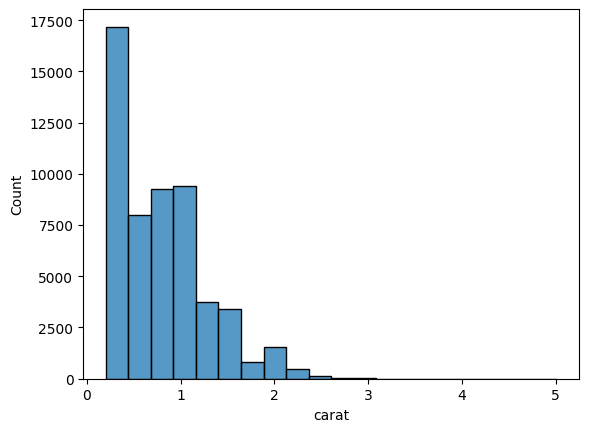

In [53]:
sns.histplot(df['carat'],bins=20)
plt.show()

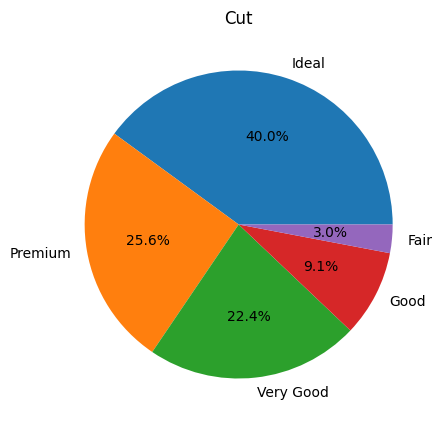

In [54]:
plt.figure(figsize=(5, 5))
plt.pie(df['cut'].value_counts(), labels=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], autopct='%1.1f%%')
plt.title('Cut')
plt.show()


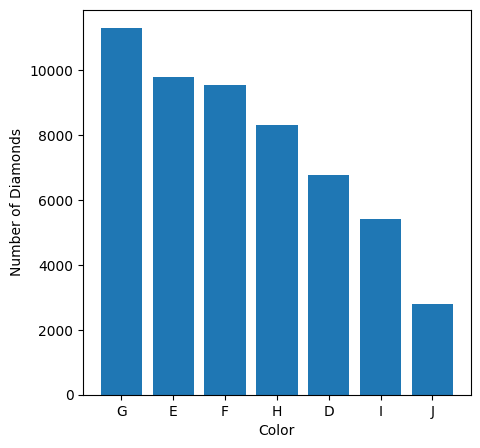

In [55]:
plt.figure(figsize=(5,5))
plt.bar(df['color'].value_counts().index,df['color'].value_counts())
plt.ylabel("Number of Diamonds")
plt.xlabel("Color")
plt.show()

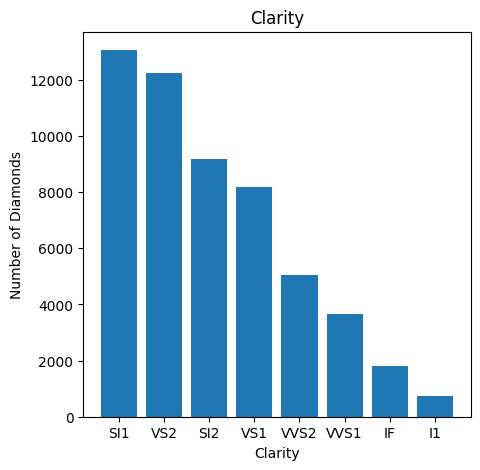

In [56]:
plt.figure(figsize=(5,5))
plt.bar(df['clarity'].value_counts().index,df['clarity'].value_counts())
plt.title('Clarity')
plt.ylabel("Number of Diamonds")
plt.xlabel("Clarity")
plt.show()

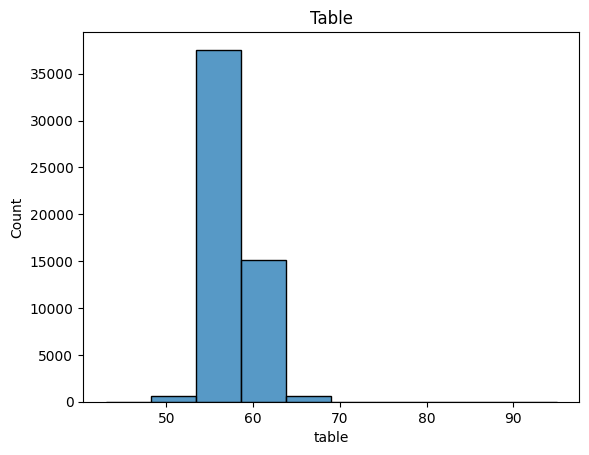

In [57]:
sns.histplot(df['table'],bins=10)
plt.title('Table')
plt.show()

### <font color="orange">Comparando as Características do Diamante com o Preço</font>

In [58]:
import warnings

warnings.filterwarnings("ignore")

In [59]:
# Defina uma paleta de cores personalizada
c = ['pink', 'purple', 'orange', 'green', 'blue']


In [60]:
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


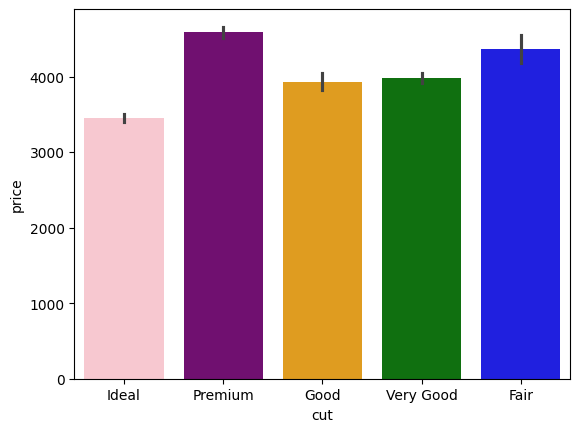

In [61]:
sns.barplot(x='cut',y='price',data=df,palette=c)
plt.show()

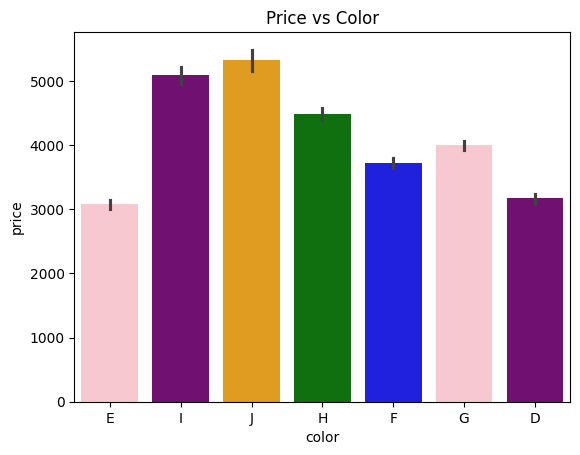

In [62]:
sns.barplot(x='color',y='price',data=df,palette=c)
plt.title('Price vs Color')
plt.show()

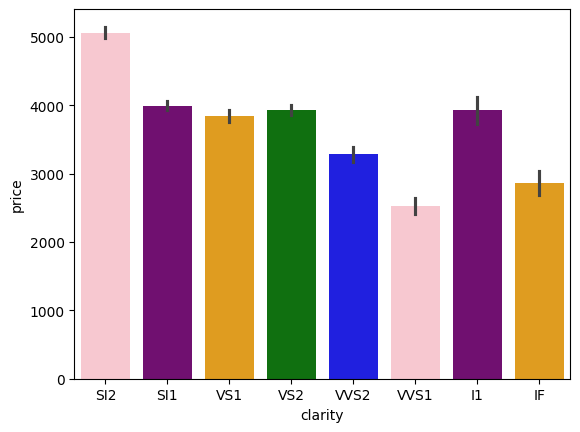

In [63]:
sns.barplot(x = 'clarity', y = 'price', data = df, palette=c)
plt.show()

A cor J e a clareza I1 são as piores características para um diamante, no entanto, quando os dados são plotados no gráfico de barras, percebe-se que o preço dos `diamantes com cor J e clareza I1 é maior do que o preço dos diamantes com cor D e clareza IF, o que é o oposto do esperado`.

### <font color="orange">Pré-processamento de dados 2<font>

In [64]:
# Alterando variáveis ​​categóricas para variáveis ​​numéricas
df['cut'] = df['cut'].map({'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1})
df['color'] = df['color'].map({'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1})
df['clarity'] = df['clarity'].map({'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1})


In [65]:
# Correlação

df.corr()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,0.096492,0.095098,0.208598,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.096492,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,0.095098,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,0.208598,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,-0.034800,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006


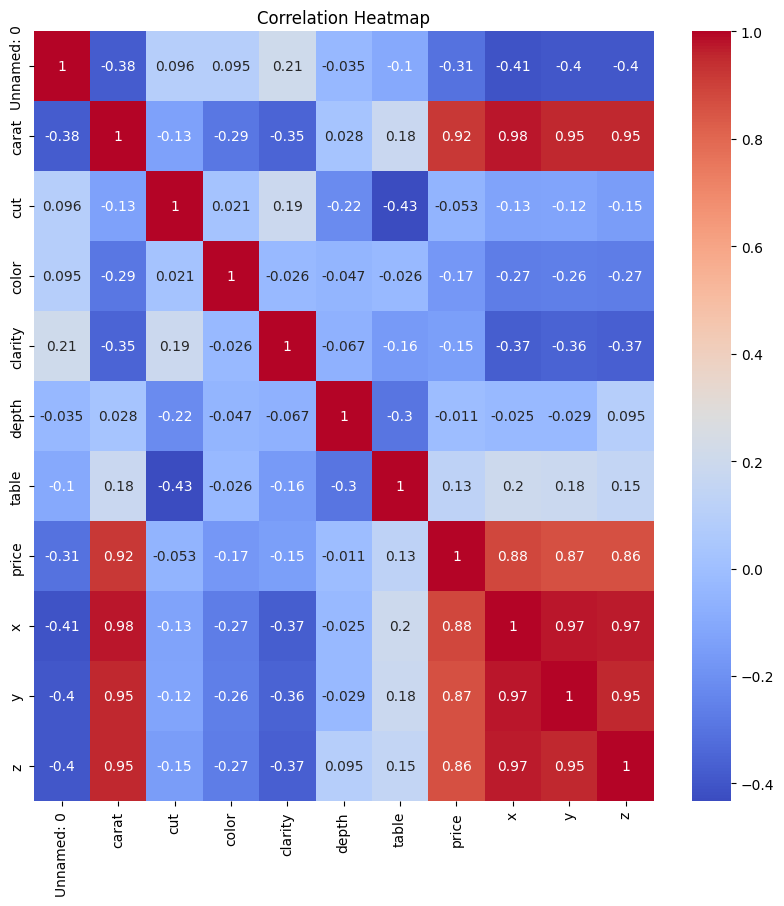

In [66]:
#plotting the correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### <font color="orange">Traçando a relação entre preço e quilate</font>

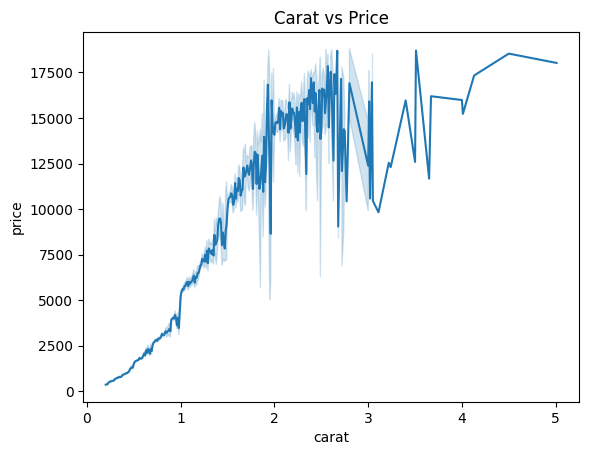

In [21]:
sns.lineplot(x='carat',y='price',data=df)
plt.title('Carat vs Price')
plt.show()

`No gráfico de linhas fica bastante claro que o preço do diamante aumenta com o aumento do quilate do diamante`. No entanto, os diamantes com menos quilates também têm alto preço. Isto se deve a outros fatores que afetam o preço do diamante.

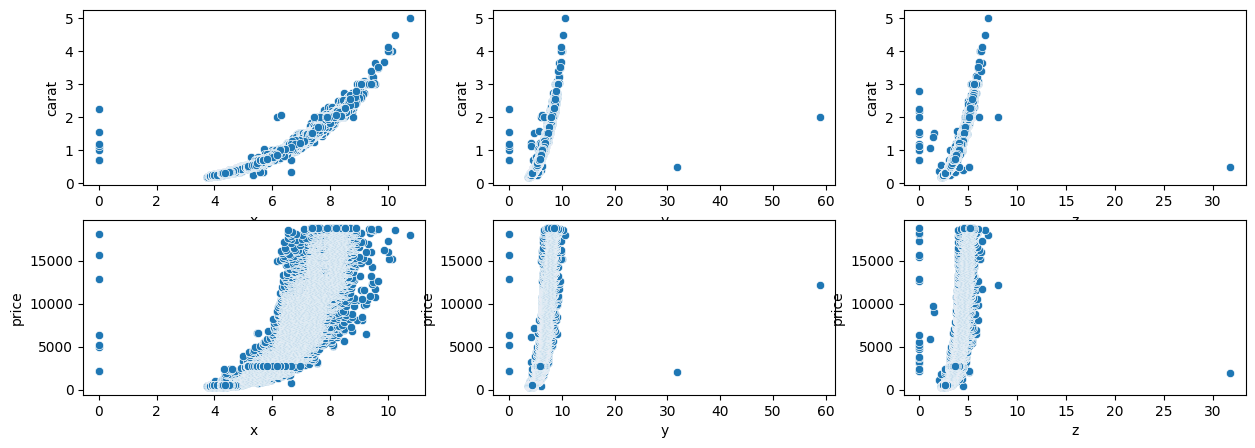

In [22]:
fig, ax = plt.subplots(2,3,figsize=(15,5))
sns.scatterplot(x='x',y='carat',data=df, ax=ax[0,0])
sns.scatterplot(x='y',y='carat',data=df, ax=ax[0,1])
sns.scatterplot(x='z',y='carat',data=df, ax=ax[0,2])
sns.scatterplot(x='x',y='price',data=df, ax=ax[1,0])
sns.scatterplot(x='y',y='price',data=df, ax=ax[1,1])
sns.scatterplot(x='z',y='price',data=df, ax=ax[1,2])
plt.show()

### <font color="orange">Train Test Split</font>

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)


### <font color="orange">Construção de modelo</font>
Decision Tree Regressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [25]:
# Treinando o modelo
dt.fit(x_train,y_train)
# accuracy
dt.score(x_train,y_train)

1.0

In [26]:
# Previsão do conjunto de testes
dt_pred = dt.predict(x_test)

### <font color="orange">Random Forest Regressor</font>

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [28]:
# Treinando o modelo
rf.fit(x_train,y_train)
# accuracy
rf.score(x_train,y_train)

0.999992699993827

In [29]:
# Previsão do conjunto de testes
rf_pred = rf.predict(x_test)

### <font color="orange">Avaliação do modelo</font>

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### <font color="orange">Random Forest Regressor</font>

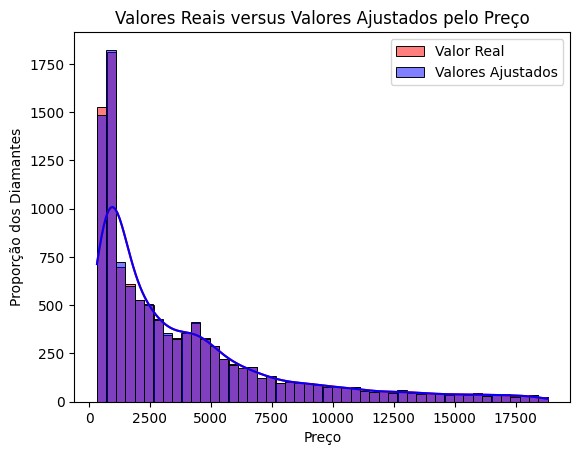

In [31]:
ax = sns.histplot(y_test, color='r', label='Valor Real', kde=True)
sns.histplot(dt_pred, color='b', label='Valores Ajustados', kde=True, ax=ax)

plt.title('Valores Reais versus Valores Ajustados pelo Preço')
plt.xlabel('Preço')
plt.ylabel('Proporção dos Diamantes')
plt.legend()
plt.show()


In [68]:
print('Decision Tree Regressor RMSE | Erro Quadrático Médio: ',np.sqrt(mean_squared_error(y_test,dt_pred)))
print('Decision Tree Regressor Accuracy: ',dt.score(x_test,y_test))
print('Decision Tree Regressor MAE | Média absoluta: ',mean_absolute_error(y_test,dt_pred))

Decision Tree Regressor RMSE | Erro Quadrático Médio:  32.47942647637631
Decision Tree Regressor Accuracy:  0.999933639995425
Decision Tree Regressor MAE | Média absoluta:  2.9541156840934373


### <font color="orange">Random Forest Regressor</font>

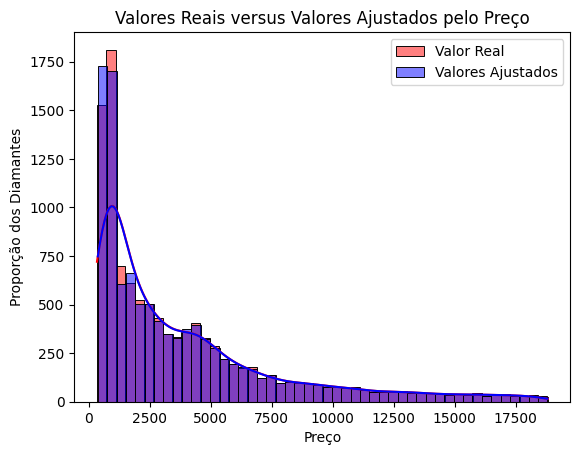

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.histplot(y_test, color='r', label='Valor Real', kde=True)
sns.histplot(rf_pred, color='b', label='Valores Ajustados', kde=True, ax=ax)

plt.title('Valores Reais versus Valores Ajustados pelo Preço')
plt.xlabel('Preço')
plt.ylabel('Proporção dos Diamantes')
plt.legend()
plt.show()


In [34]:
print('Random Forest Regressor RMSE:',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('Random Forest Regressor Accuracy:',rf.score(x_test,y_test))
print('Random Forest Regressor MAE:',mean_absolute_error(y_test,rf_pred))

Random Forest Regressor RMSE: 24.12639104075586
Random Forest Regressor Accuracy: 0.9999633837024315
Random Forest Regressor MAE: 2.6079801631442416


### <font color="orange">Conclusão</font>

Ambos os modelos têm quase a mesma precisão. No entanto, o Random Forest Regressor é ligeiramente melhor que o modelo Decision Tree Regressor.

Há algo interessante sobre os dados. O preço dos diamantes com cor J e a clareza I1 é superior ao preço dos diamantes com cor D e clareza IF que não poderia ser explicado pelos modelos. Isto pode ser devido a outros fatores que afeta o preço do diamante.